# 测试命令
./infer.py -d /media/cyj/DATA/Rangenet++/train/tasks/semantic/dataset -l /media/cyj/DATA/Rangenet++/train/tasks/semantic/prediction -m /media/cyj/DATA/Rangenet++/train/tasks/semantic/pre_trained_model/darknet21


# parser.py
有标签情况 (self.gt 为 True)：当处理带有语义标签的数据时（如训练集或验证集），SemLaserScan 类被用来同时处理点云数据和对应的语义标签。在这种情况下，self.color_map 提供了一种将语义标签映射到颜色的方式，这对于可视化和验证数据非常有用。

无标签情况 (self.gt 为 False)：当仅处理点云数据而不关心语义标签时（如测试集或仅进行点云处理的场景），使用 LaserScan 类而不是 SemLaserScan 类。在这种情况下，不需要 self.color_map，因为没有语义标签要映射到颜色。

proj_argmax 是在二维投影（例如 Range Image）上的语义分割结果，通常用于图像形式的处理。

unproj_argmax 是将 proj_argmax 反投影回三维空间的结果，保持了原始点云的结构和形式。

In [6]:
# 对label文件查看,以00序列的第0帧为例
import numpy as np

# 假设 label_file 是您的标签文件路径
label_file = '../prediction/sequences/00/predictions/proj_000000.label'

# 读取二进制文件
labels = np.fromfile(label_file, dtype=np.int32)

print(labels.shape) 

# 打印前几个标签
print(labels[:10])

print(64*1024*2)


(131072,)
[70 70 70 70 70 70 70 70 70 70]
131072


In [7]:
# 重塑数组
height, width, channels = 64, 1024, 2

# 重塑数组
labels_reshaped = labels.reshape((height, width, channels))

# 分离标签和额外数据
labels_only = labels_reshaped[:, :, 0]  # 假设标签是第一个通道
extra_data = labels_reshaped[:, :, 1]  # 假设额外数据是第二个通道


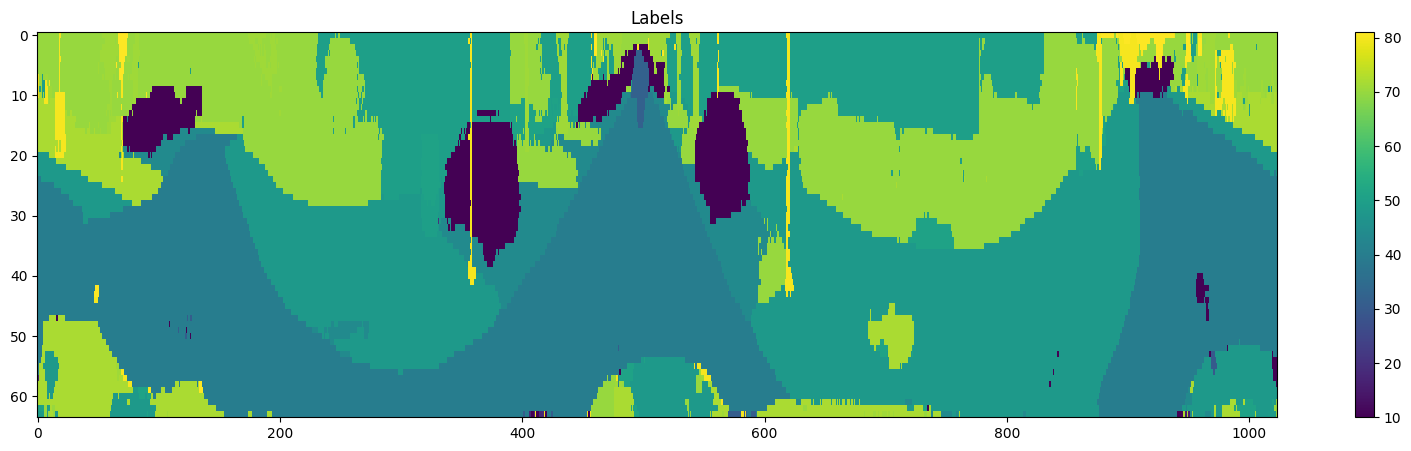

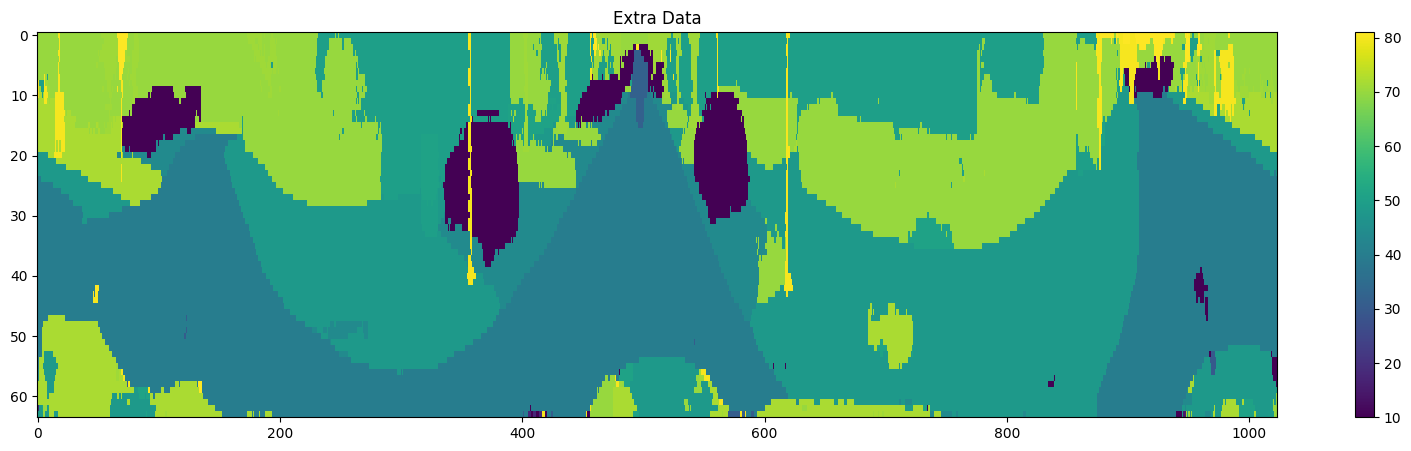

In [9]:
import matplotlib.pyplot as plt
# 可视化标签
plt.figure(figsize=(20, 5))
plt.imshow(labels_only, aspect='auto', interpolation='nearest')
plt.colorbar()
plt.title("Labels")
plt.show()

# 可视化额外数据
plt.figure(figsize=(20, 5))
plt.imshow(extra_data, aspect='auto', interpolation='nearest')
plt.colorbar()
plt.title("Extra Data")
plt.show()

In [10]:
# 比较两个数组是否完全相同
are_arrays_equal = np.array_equal(labels_only, extra_data)

print("Are the two arrays equal?:", are_arrays_equal)

Are the two arrays equal?: False


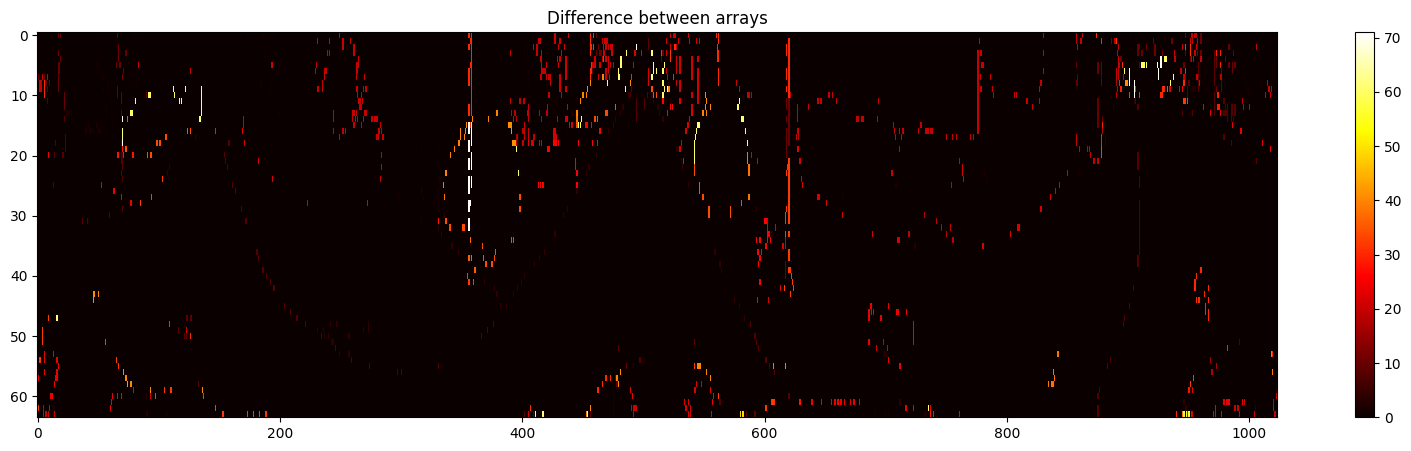

In [11]:
# 计算差异
diff_array = np.abs(labels_only - extra_data)

# 可视化差异
plt.figure(figsize=(20, 5))
plt.imshow(diff_array, aspect='auto', cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title("Difference between arrays")
plt.show()
